<h1 align="center"><font size = 8>Machine Learning | 2024 </font></h1>
<br>
<h2 align="center"><font size = 6  color="darkblue"> KNN Classifier </font></h2>
<h3 align="center">Abdulrahman Nourzad</h3>
<h4 align="center">Master's in Computer Software Engineering & Post DBA in Business Intelligence</h4>
<br>
<br>
<hr>

# Project 7: Prediction of Breast Cancer with KNN Algorithm using python 

**KNN Algorithm:**
- The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle **classification** and **regression** problems.
- In this algorithm, we calculate the distance between test features with the prediction data under training, and then based on them, we consider a prediction value for the test.
- There are various formulas and techniques to calculate the distance between data. The most important of them are the following:
  - Manhattan Distance
  - Euclidean Distance
  - Minkowski Distance

# Step 1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Step 2: Import the Dataset

In [2]:
cancer = load_breast_cancer()

In [3]:
data = np.c_[cancer.data, cancer.target]

columns = np.append(cancer.feature_names, ["target"])

df = pd.DataFrame(data, columns=columns)

# Step 3: Data Overview

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df[df['target']==1].shape

(357, 31)

In [8]:
df[df['target']==0].shape

(212, 31)

# Step 4: EDA

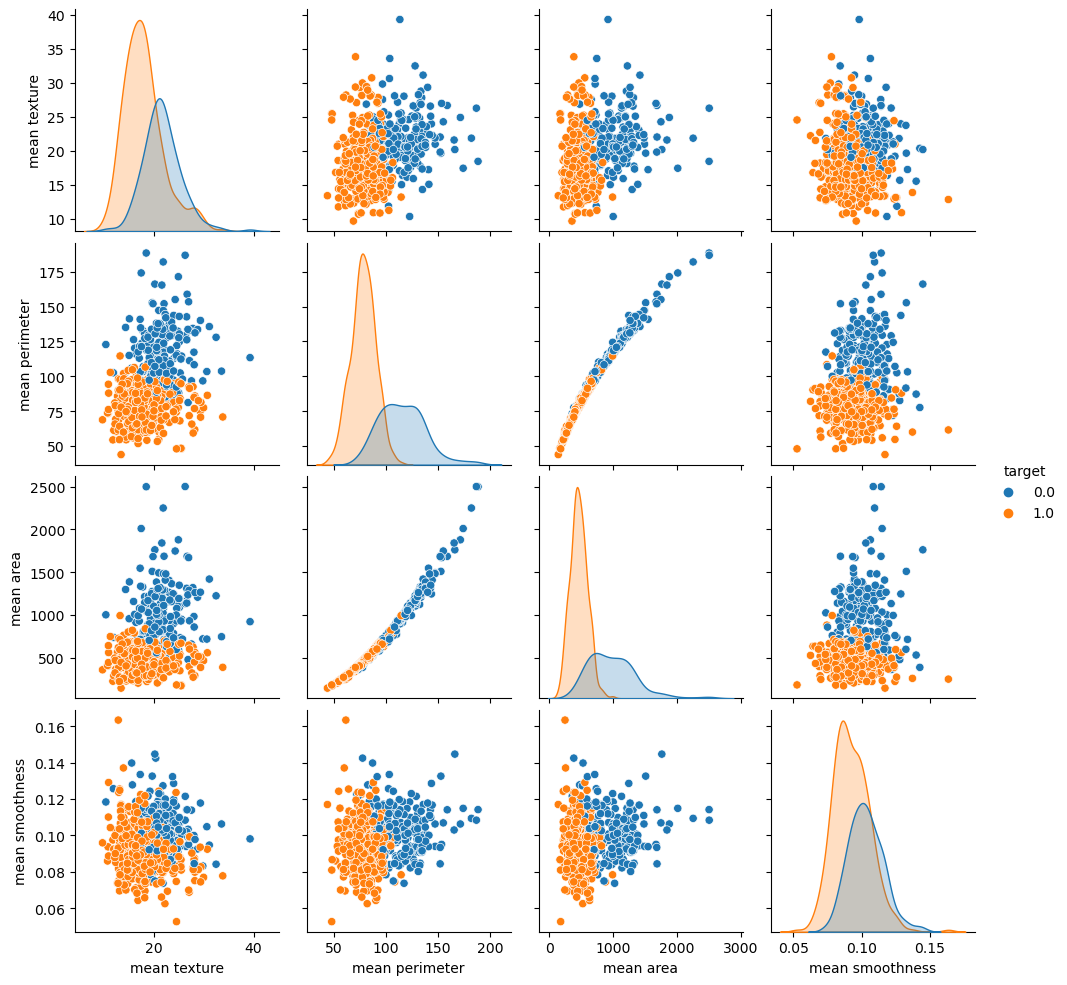

In [9]:
sns.pairplot(df.iloc[:, [1,2,3,4,30]], hue='target')
plt.show()

# Step 5: X & y

In [10]:
X = df.drop('target', axis=1)

y = df['target']

# Step 6: Split the Data to Train & Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scaling the Features

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# Step 8: Train the Model

In [15]:
# create model
KNN_model = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='minkowski', p=2)

In [16]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

# Step 9: Predicting Test Data

In [17]:
y_pred = KNN_model.predict(X_test)

In [18]:
y_pred

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

# Step 10: Evaluating the Model

In [19]:
acc_1 = accuracy_score(y_test, y_pred)
acc_1

0.9385964912280702

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92        43
         1.0       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



# Step 11: Operations to tune the model (Finding the best K)

### Method A: Elbow Method for Choosing Reasonable K Values

In [21]:
error = []

for k in range(1, 31):
    #creat model
    KNN_model_New = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=2)
    
    # fit model
    KNN_model_New.fit(X_train, y_train)
    
    # predict
    y_pred_New = KNN_model_New.predict(X_test)
    
    test_error = 1-accuracy_score(y_test, y_pred_New)
    
    error.append(test_error)

In [22]:
min_value = min(error)
min_index = error.index(min_value)
print(f"Minimum value is: {min_value} at index: {min_index}")

Minimum value is: 0.03508771929824561 at index: 8


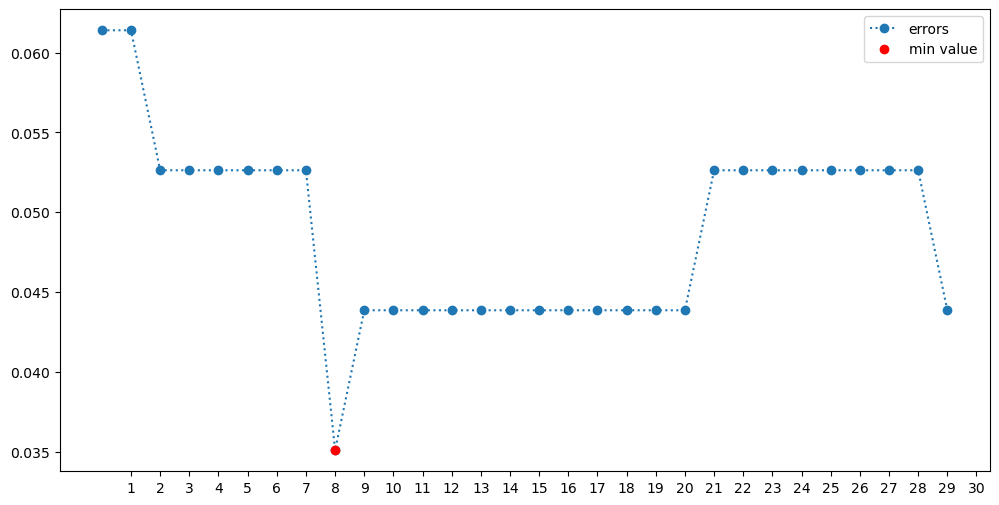

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(error,':o', label='errors')
plt.plot(min_index, min_value, 'ro', label = 'min value')
plt.xticks(np.arange(1,31,1))
plt.legend()
plt.show()

### Method B: Creating a Pipeline to find K value

In [24]:
scaler = StandardScaler()

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [27]:
oper = [('scaler', scaler), ('knn', knn)]

In [28]:
pipe = Pipeline(oper)

In [29]:
k_v = list(range(1, 31))

p_grid = {'knn__n_neighbors': k_v}

In [30]:
CV_grid = GridSearchCV(pipe, p_grid, cv=20, scoring='accuracy')

In [31]:
CV_grid.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [32]:
CV_grid.best_params_

{'knn__n_neighbors': 8}

**Result:** The best k is 8

# Step 12: Using tuned KNN model (using the best K)

In [33]:
# create model
KNN_model_8 = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='minkowski', p=2)

In [34]:
KNN_model_8.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [35]:
y_pred_8 = KNN_model_8.predict(X_test)

In [36]:
y_pred_8

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [37]:
acc_8 = accuracy_score(y_test, y_pred_8)
acc_8

0.9473684210526315

In [38]:
cm = confusion_matrix(y_test, y_pred_8)

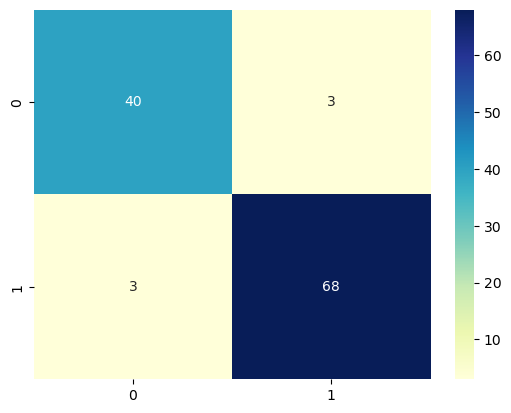

In [39]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [40]:
print(classification_report(y_test, y_pred_8))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        43
         1.0       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



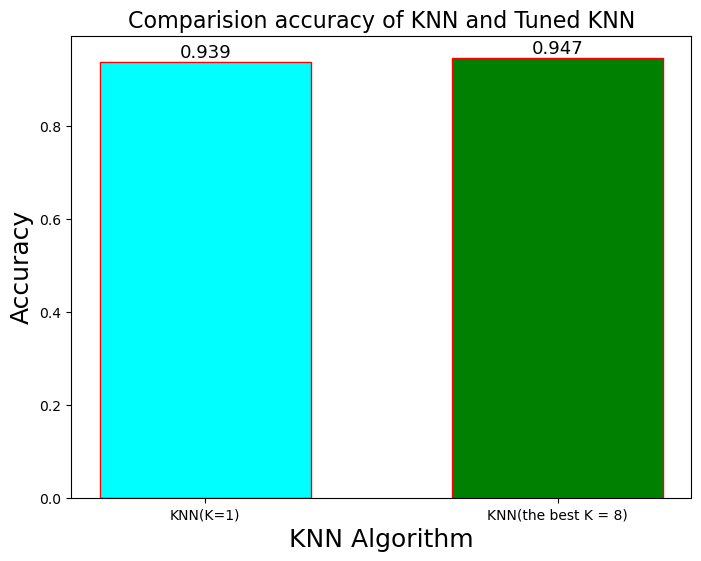

In [41]:
plt.figure(figsize=(8,6))
models_acc = {'KNN(K=1)':acc_1,
              'KNN(the best K = 8)':acc_8}
plt.bar(models_acc.keys(), models_acc.values(),
        color=('cyan', 'green'), width=0.6,
        edgecolor='red')
plt.xlabel('KNN Algorithm', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('Comparision accuracy of KNN and Tuned KNN', fontsize=16)

# Adding annotations to the bars
for i, value in enumerate(models_acc.values()):
    label = f"{value:.3f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=13)

plt.show()

<div class="alert alert-success" role="alert">
     <h1 class="alert-heading">Well done!</h1>
     <p> Best Wishes!, Nourzad</p>
</div>